In [ ]:
# Warmup 1:  Match each of these SQL terms to the parts of the database they narrow
#            Choose one of the following:  Table, Row(s), Column(s)

# SQL Commands:  
# the SELECT command narrows our data based on       Columns
# the FROM command narrows our data based on         Table
# the WHERE command narrows our data based on         Row
# the LIMIT command narrows our data based on         Rows






#### Warmup 2: Download the following database to your current directory:

https://github.com/tylerharter/caraza-harter-com/blob/master/tyler/meena/cs220/f20/materials/lectureDemo_code/lec-34/movies.db


    

In [48]:
# Warmup #3: Use Sqlite 3 to connect to a database

import os, sqlite3, pandas as pd

# We are going to use this database
file_name = "movies.db"

# assert that the database exists in your current directory (why is this important?)
assert os.path.exists(file_name)


# make a connection to our database using sqlite3
con = sqlite3.connect(file_name)
print(con)

# notice that con is an object....the 0x is the hexadecimal address where it lives on the heap


### Lecture 35: Aggregating and Grouping in SQL
**Learning Objectives:**
    
35.1 Use SQL Aggregate functions to summarize database columns:  SUM, AVG, COUNT, MIN, MAX, DISTINCT

35.2 Use the GROUP BY command to place database rows into buckets.

35.3 Use the HAVING command to apply conditions to groups.

35.4 Answer questions about a database using SQL commands with multiple parts in the correct order.



In [15]:
# this query shows us what we have to work with:
df = pd.read_sql("select * from sqlite_master", con)

In [16]:
for command in df["sql"]:
    print(command)

CREATE TABLE "movies" (
"Title" TEXT,
  "Director" TEXT,
  "Year" INTEGER,
  "Runtime" INTEGER,
  "Rating" REAL,
  "Revenue" REAL
)


In [4]:
# write a query that shows us the first 15 rows of all the columns in movies
query = """
  SELECT * 
  from movies 
  limit 15
"""
pd.read_sql(query, con)

,Title,Director,Year,Runtime,Rating,Revenue
0,Guardians of the Galaxy,James Gunn,2014,121,8.1,333.13
1,Prometheus,Ridley Scott,2012,124,7.0,126.46
2,Split,M. Night Shyamalan,2016,117,7.3,138.12
3,Sing,Christophe Lourdelet,2016,108,7.2,270.32
4,Suicide Squad,David Ayer,2016,123,6.2,325.02
5,The Great Wall,Yimou Zhang,2016,103,6.1,45.13
6,La La Land,Damien Chazelle,2016,128,8.3,151.06
7,Mindhorn,Sean Foley,2016,89,6.4,0.00
8,The Lost City of Z,James Gray,2016,141,7.1,8.01
9,Passengers,Morten Tyldum,2016,116,7.0,100.01


In [8]:
# show the title and rating of the top 2 movies with the highest rating
query = """
  SELECT Title, Rating
  FROM movies
  order by Rating DESC
  limit 2
"""
pd.read_sql(query, con)

,Title,Rating
0,The Dark Knight,9.0
1,Inception,8.8


In [17]:
# what were the top 3 movies in terms of revenue in 2015?
query = """
  SELECT Title, Revenue
  from movies
  where Year == 2015
  order by Revenue DESC
  limit 3
"""
pd.read_sql(query, con)

,Title,Revenue
0,Star Wars: Episode VII - The Force Awakens,936.63
1,Jurassic World,652.18
2,Avengers: Age of Ultron,458.99


In [18]:
# We can rename a column using the word AS

query = """
    SELECT Title, Revenue AS "$ MILLIONS"
    FROM movies

"""
pd.read_sql(query, con)


,Title,$ MILLIONS
0,Guardians of the Galaxy,333.13
1,Prometheus,126.46
2,Split,138.12
3,Sing,270.32
4,Suicide Squad,325.02
...,...,...
993,Secret in Their Eyes,0.00
994,Hostel: Part II,17.54
995,Step Up 2: The Streets,58.01
996,Search Party,0.00


### We can use simple math functions on a column
- SUM, AVG, COUNT, MIN, MAX, DISTINCT
- put this in the SELECT command
- can qualify it with DISTINCT


In [19]:
# how do we show all our data? 
query = """
    SELECT *
    FROM movies
"""
pd.read_sql(query, con)

,Title,Director,Year,Runtime,Rating,Revenue
0,Guardians of the Galaxy,James Gunn,2014,121,8.1,333.13
1,Prometheus,Ridley Scott,2012,124,7.0,126.46
2,Split,M. Night Shyamalan,2016,117,7.3,138.12
3,Sing,Christophe Lourdelet,2016,108,7.2,270.32
4,Suicide Squad,David Ayer,2016,123,6.2,325.02
...,...,...,...,...,...,...
993,Secret in Their Eyes,Billy Ray,2015,111,6.2,0.00
994,Hostel: Part II,Eli Roth,2007,94,5.5,17.54
995,Step Up 2: The Streets,Jon M. Chu,2008,98,6.2,58.01
996,Search Party,Scot Armstrong,2014,93,5.6,0.00


In [21]:
# find the average length of a movie...don't need the other commands
query = """
    SELECT AVG(Runtime)
    FROM movies
"""
pd.read_sql(query, con)

# can also round it similar to Python rounding

,AVG(Runtime)
0,113.170341


In [22]:
query = """
    SELECT AVG(RATING)
    FROM movies
"""
pd.read_sql(query, con)

,AVG(RATING)
0,6.723447


In [23]:
#What is the average runtime of movies with a rating above average? 

query = """
    SELECT AVG(RUNTIME)
    FROM movies
    WHERE RATING > (SELECT AVG(RATING) FROM movies)
"""
pd.read_sql(query, con)



,AVG(RUNTIME)
0,119.005859


In [26]:
# find the count of the movies where runtime > 120
query = """
    SELECT COUNT(*)  AS "count (runtime > 120)"
    FROM MOVIES
    WHERE RUNTIME > 120

"""
pd.read_sql(query, con)

,count (runtime > 120)
0,289


In [27]:
# what is the count of distinct directors?
query = """
    SELECT COUNT(DISTINCT Director)
    FROM movies
"""
pd.read_sql(query, con)

,COUNT(DISTINCT Director)
0,643


In [28]:
# What is the average rating and revenue of movies longer than 120 minutes? 

query = """
    SELECT AVG(RATING), AVG(REVENUE)
    FROM MOVIES
    WHERE RUNTIME > 120
    
"""
pd.read_sql(query, con)

,AVG(RATING),AVG(REVENUE)
0,7.168512,118.681799


In [29]:
# What is the average rating and revenue of movies less than or equal to 120 minutes? 

query = """
    SELECT AVG(RATING), AVG(REVENUE)
    FROM MOVIES
    WHERE RUNTIME <= 120
"""
pd.read_sql(query, con)

,AVG(RATING),AVG(REVENUE)
0,6.542031,53.478717


In [33]:
# What percentage of the total revenue from 2016 came from the highest revenue movie?

query = """
    SELECT TITLE, 100* MAX(REVENUE) / SUM(REVENUE)
    FROM MOVIES
    WHERE YEAR = 2016
    
"""
pd.read_sql(query, con)

,Title,100* MAX(REVENUE) / SUM(REVENUE)
0,Rogue One,4.746581


### GROUP BY allows you to put rows into buckets
- Place it between FROM and ORDER BY

In [34]:
# what is the average Runtime and Revenue by year ?
query = """
    SELECT YEAR, AVG(RUNTIME) , AVG(revenue)
    FROM movies
    GROUP BY YEAR
    ORDER BY YEAR ASC
"""
pd.read_sql(query, con)

,Year,AVG(RUNTIME),AVG(revenue)
0,2006,120.840909,82.374091
1,2007,121.622642,81.249623
2,2008,110.826923,97.177308
3,2009,116.117647,103.769804
4,2010,111.133333,99.827500
5,2011,114.603175,86.221587
6,2012,119.109375,107.973281
7,2013,116.133333,83.824556
8,2014,114.489796,81.606122
9,2015,114.496063,69.717480


In [36]:
# what is the average Runtime and Revenue by year for 2010 to 2016
query = """
    SELECT YEAR, AVG(RUNTIME) , AVG(revenue)
    FROM movies
    WHERE YEAR >= 2010 AND YEAR <= 2016
    GROUP BY YEAR
    ORDER BY YEAR ASC
"""
pd.read_sql(query, con)

,Year,AVG(RUNTIME),AVG(revenue)
0,2010,111.133333,99.827500
1,2011,114.603175,86.221587
2,2012,119.109375,107.973281
3,2013,116.133333,83.824556
4,2014,114.489796,81.606122
5,2015,114.496063,69.717480
6,2016,107.337838,37.877196


In [41]:
# Who are the top 5 Directors that had the most movies earning *over 100M dollars*?

query = """
    SELECT Director, Count(*) AS "MOVIES OVER $100M"
    FROM MOVIES
    WHERE REVENUE > 100
    GROUP BY DIRECTOR
    ORDER BY "MOVIES OVER $100M" DESC
    LIMIT 5

"""
pd.read_sql(query, con)

,Director,MOVIES OVER $100M
0,David Yates,6
1,J.J. Abrams,5
2,Zack Snyder,4
3,Ridley Scott,4
4,Paul Feig,4


### The HAVING command allows you to put conditions on Groups
- goes after the GROUP BY commmand

In [45]:
# for all directors with at least 3 movies, find the 10 directors with the top avg ratings
query = """
    SELECT director, AVG(rating) AS rating, COUNT(*) as count
    FROM movies
    GROUP BY director
    HAVING count >= 3
    ORDER BY rating DESC
    LIMIT 10
"""
pd.read_sql(query, con)

ProgrammingError: Cannot operate on a closed database.

In [58]:
# Which *directors* have had *more than 3 movies* that have been *since 2010*?
query = """
    SELECT Director, COUNT(*) as count
    FROM movies
    WHERE Year >= 2010
    GROUP BY Director
    HAVING count > 3
    ORDER BY count DESC


"""
pd.read_sql(query, con)


,Director,count
0,Ridley Scott,5
1,Paul W.S. Anderson,5
2,Denis Villeneuve,5
3,Woody Allen,4
4,Peter Berg,4
5,Paul Feig,4
6,Mike Flanagan,4
7,Michael Bay,4
8,Martin Scorsese,4
9,M. Night Shyamalan,4


In [43]:
# DON'T FORGET TO CLOSE YOUR CONNECTION
con.close()

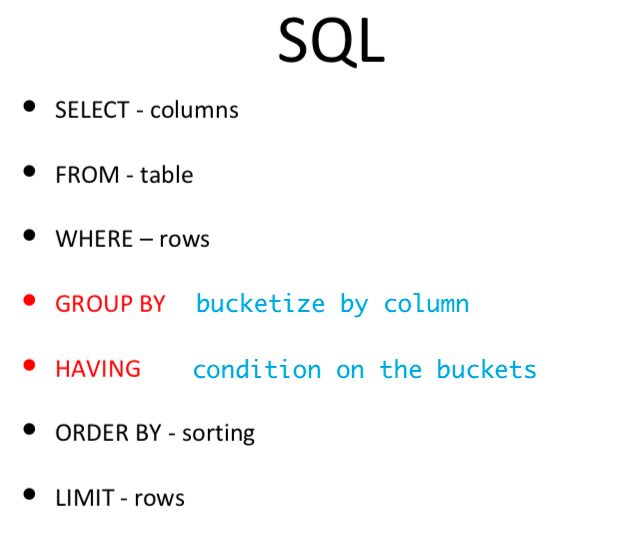